# Introduction
I'll be looking at data between life expectancy and GDP from a list of countries.

The goal is the find a correlation between GDP and life expectancy by preparing, analysing and plotting the data, and seeking to explain the findings from the study.

**First, lets prepare the data to explore.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import pandas as pd
#EDA
df_original = pd.read_csv('all_data.csv')

# Let's rename Life expectancy at birth (years) because its inconvenient for programing - will change it to 'Life'
df = df_original.rename({'Country':'Country', 'Year':'Year', 'Life expectancy at birth (years)':'Life', 'GDP':'GDP'}, axis =1)

#Let's take a look at the shape of the data
#print(df.shape) # 96, 4

print(df.head()) #looks good? lets do a quick test
#print(df[df.isnull().any(axis=1)]) #quick test for null values - looks good

#Which countries and what is the timeframe of this data set?
print(df.Year.unique())
print(df.Country.unique())

#use colorblind friendly colors
sns.set_palette('colorblind')

  Country  Year  Life           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


# Data distributions
Now let's look how GDP and Life is distributed
The graphy is very right leaning, meaning most of the data is on the left side.

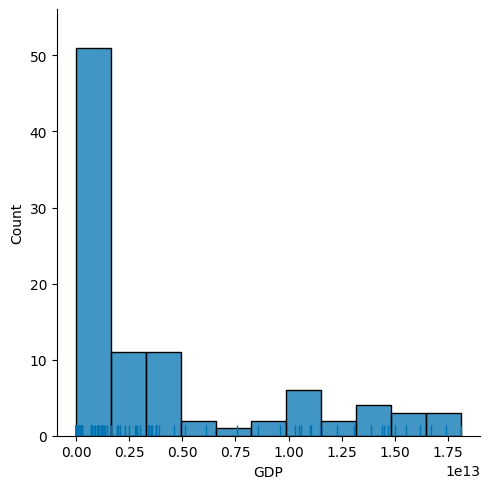

<Figure size 640x480 with 0 Axes>

In [2]:
#first GDP
sns.displot(data = df.GDP, rug = True)
plt.show()
plt.clf()

# Now for life expectancy distribution!
This distribution is the opposite. Having a very left skew with most of the data on the right side.

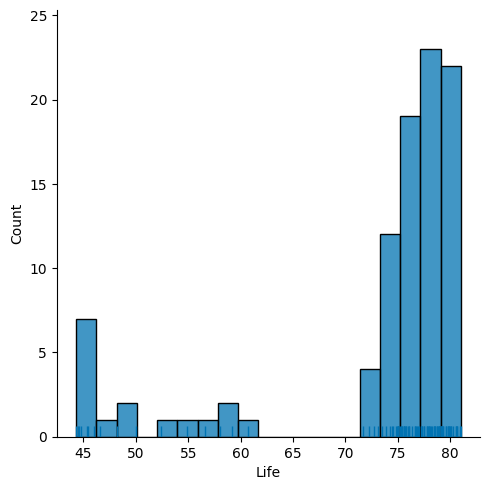

In [3]:
sns.displot(df.Life, rug = True)
plt.show()
plt.clf()

# Average life expectancy and GDP for each country.
It looks like the skews are coming from Zimbabwe for having a lower life expectancy, and USA with a very high GDP while Chile, Mexico, and Zimbabwe how a much lower GDP while China and Germany are in between.

(6, 4)
                    Country    Year      Life           GDP
0                     Chile  2007.5  78.94375  1.697888e+11
1                     China  2007.5  74.26250  4.957714e+12
2                   Germany  2007.5  79.65625  3.094776e+12
3                    Mexico  2007.5  75.71875  9.766506e+11
4  United States of America  2007.5  78.06250  1.407500e+13
5                  Zimbabwe  2007.5  50.09375  9.062580e+09


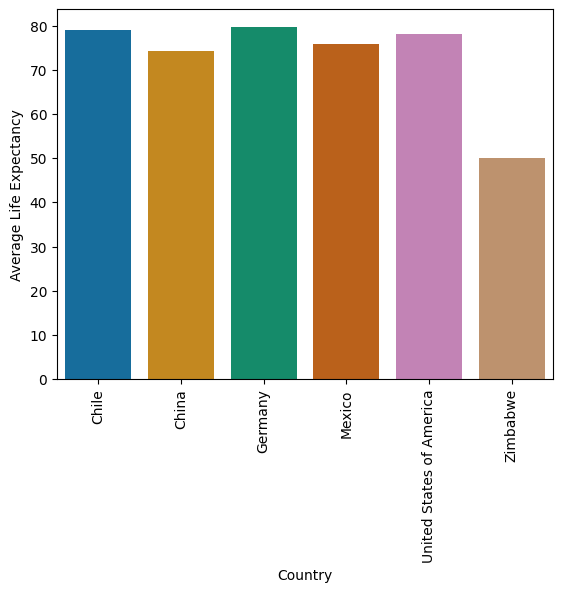

In [13]:
#create a new df where we group everything into a small df and find the avg Life and GDP
df_mean = df.groupby(df.Country).mean().reset_index()
print(df_mean.shape) # looks good
print(df_mean.head(6))
sns.barplot(data = df_mean, x = 'Country', y = 'Life')
plt.xticks(rotation='vertical')
plt.ylabel('Average Life Expectancy')
plt.show()
plt.clf()

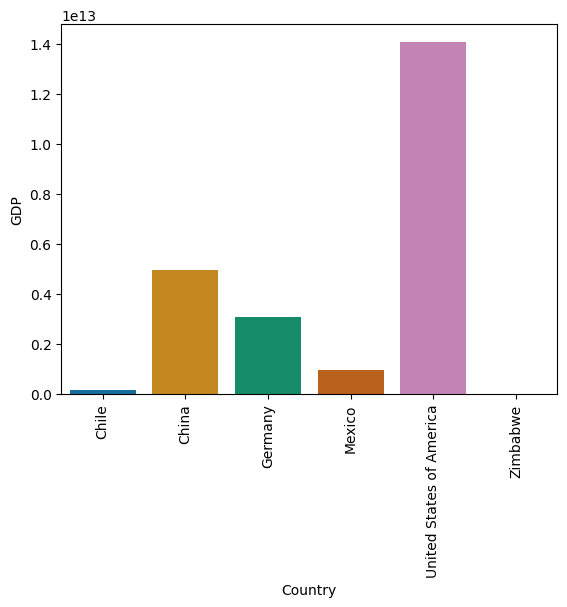

In [5]:
sns.barplot(data = df_mean, x = 'Country', y = 'GDP')
plt.xticks(rotation = 'vertical')
plt.show()
plt.clf()

# Swarm Plots
Using Swarm plots, we can look at the distribution and the dot density around values. For example, we can see the different life expectancies of Zimbabwe, and the massive GDP growth of China.

<Figure size 640x480 with 0 Axes>

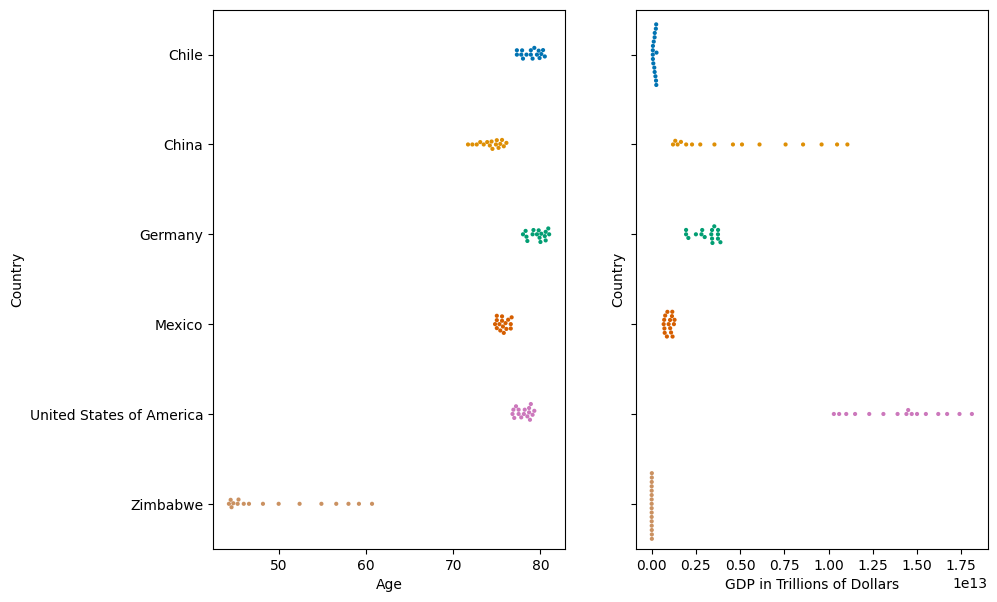

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 7))
ax[0] = sns.swarmplot(ax = ax[0], data = df, x = 'Life', y = 'Country', size=3)
ax[0].set_xlabel('Age')
ax[1] = sns.swarmplot(ax = ax[1], data = df, x = 'GDP', y = 'Country', size = 3)
ax[1].set_xlabel('GDP in Trillions of Dollars')
plt.show()
plt.clf()

# GDP Growth Over Time
Using a barplot with year as a hue, we can visually see how large China and USA's GDP grew. We can also see how Germany, Mexico and Chile had a more steady growth.

<Figure size 640x480 with 0 Axes>

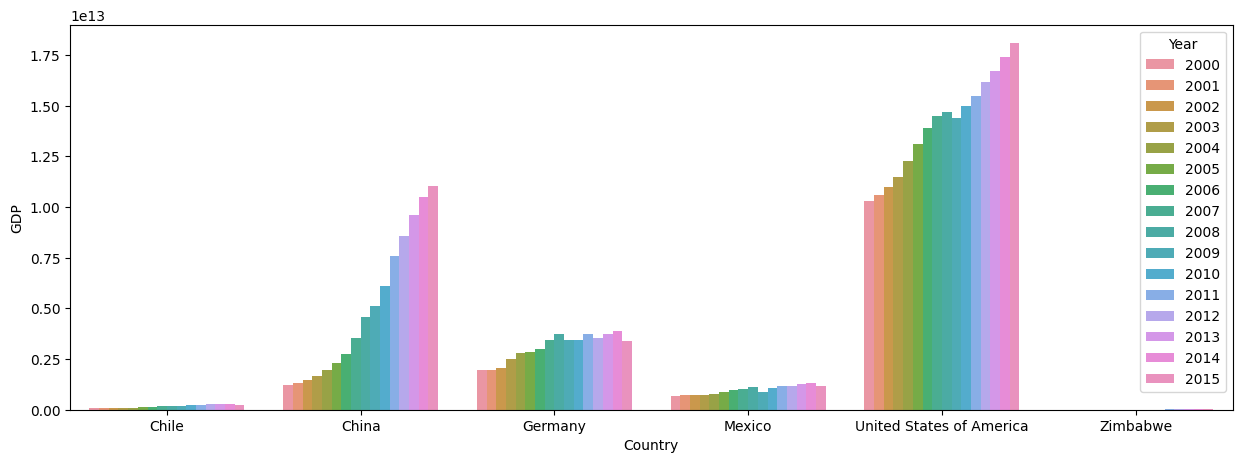

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Country', y = 'GDP', hue = 'Year', data = df)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

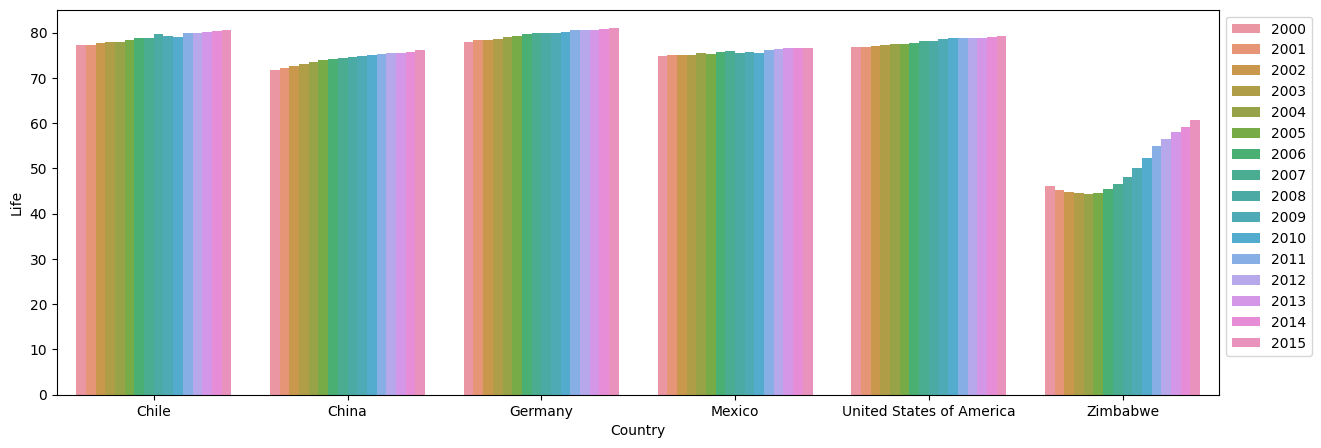

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Country', y = 'Life', hue = 'Year', data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()
plt.clf()

# GDP Growth Per Year
Using a line plot, we can better visualize each country's GDP growth in more detail. For example, we can see China's growth from 2008 to 2015 to be about half a trillion. We also see how Chile and Zimbabwe didn't have much growth. This graph also shows us the flucation of each country's GDP and allows us to further look into detail why if needed.

<Figure size 640x480 with 0 Axes>

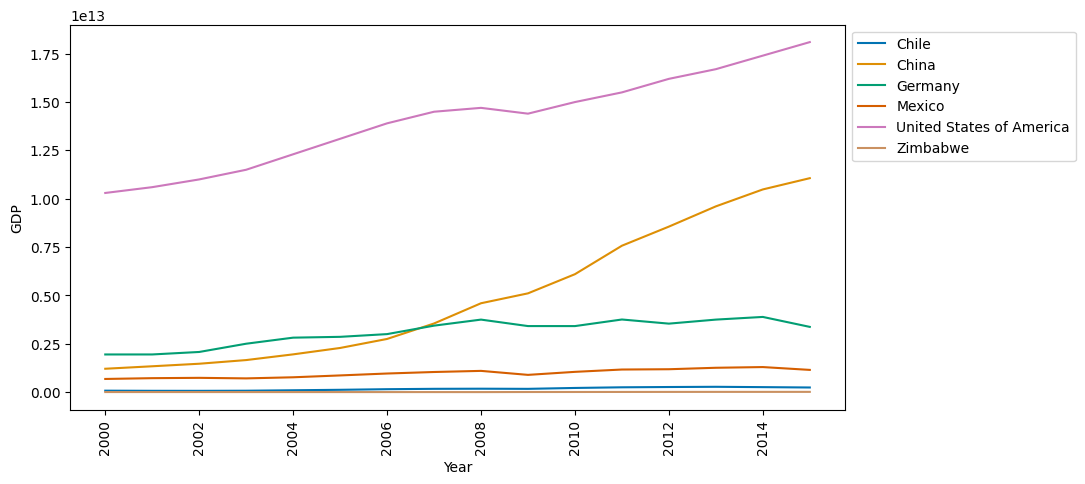

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Year', y = 'GDP', hue = 'Country', data = df)
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()
plt.clf()

# Detailed Line Plots
Giving each country their own Y axis, we can zoom in and see actual dips and spikes within the time frame. For example, Zimbabwe's GDP in the graph above shows a slight dip around 2009, while referencing other countries. However, we can see a large spike relatively to its own GDP. We are now able to see that each country had growth from the year 2000.

<Figure size 640x480 with 0 Axes>

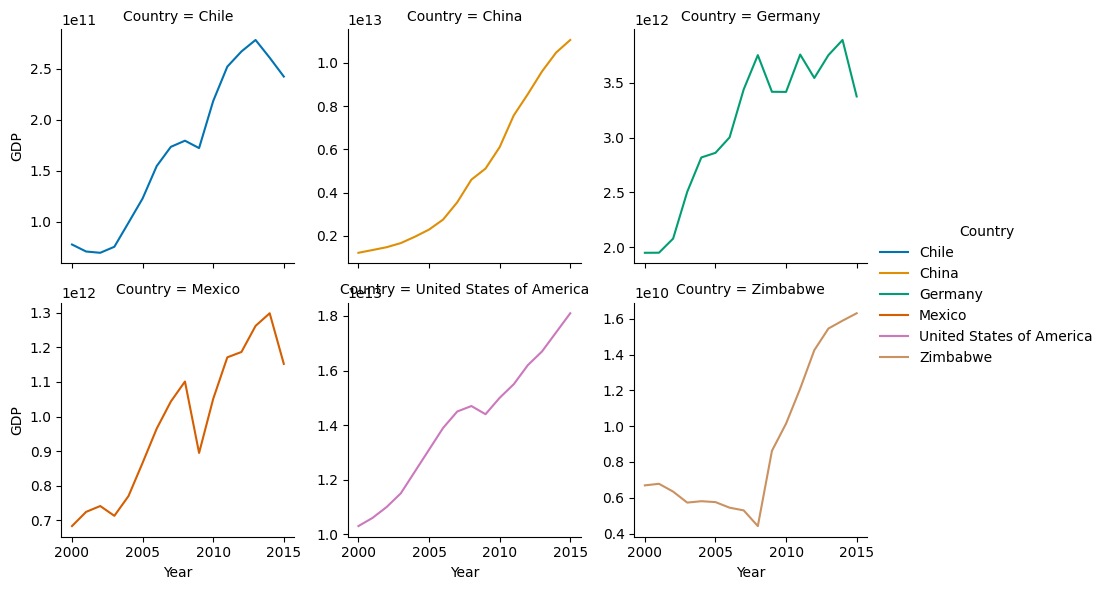

In [10]:
g = sns.FacetGrid(df, col = 'Country', col_wrap=3, hue = 'Country', sharey=False)
g.map(sns.lineplot, 'Year', 'GDP').add_legend()
plt.show()
plt.clf()

# Conclusion
In this project we were able to compare a few countries' GDP, and life expectancy. We were able to answer the following questions:
- Did each country's GDP grow over the time period from 2000 - 2015?
    - Yes, At a glance, it's hard to tell, but we are able to look closer and see even Zimbabwe had a GDP growth.
- Has the life expectancy increased over time?
    - Yes, especially Zimbabwe, which had a significant increase in life expectancy.
- Is there a correlation between GDP and life expectancy?
    - There is a correlation between GDP growth and life expectancy, but having a higher GDP does not necessarily means the life expectancy is going to be much higher.
- Which country had the highest life expectancy?
    - The highest with Germany, followed by Chile and then USA
- What was the average life expectancy?
    - Between 75 and 80 years old except Zimbabwe which is around 50 years.
